In [ ]:
%matplotlib widget
from IPython.display import display, HTML
display(HTML("<style>.container{width:100% !important;}</style>"))

# Widgets as Output: A Demo

In this notebook we learn how to create widgets for entering parameters for the `Optimizer` class. These widgets provide the final PoC a user friendly interface for entering or changing the problem parameters.

The widgets appear as _tabs_ after calling the `Optimizer`. Each of these tabs as a rule needs to be called in the order of appearance from left to right. Any tab consists of entries as text, integers, floats _etc._ as needed. Once these entries have been entered using the keyboard or the slider, one can run a tab by pressing _Call_. The output of running any tab appears on the right hand side in the output panel.

The `__init__` constructor contains the name of the object to be created, and a sequence of lists of dictionaries, called by `OptimizerModel.__init__`. Each list corresponds to a _tab_. The entries inside any such list are defined as dictionary, with their name, type, value, label, _etc._. These dictionaries define widgets. The name of a list in the `__init__` constructor is the name of the corresponding method of the model + "_ _parameter" (e.g._ `load` method takes parameters defined inside the _load_parameter_ list).

To better understand it is advisable to run through the notebook below.

In this notebook the widgets are added to the `Setup scenario`-tab, but can also be added to the `Build QUBO`- or `Compose model`-tab in a similar way. You can also add a toolbar with widgets to your `Report`- or `Visualization`-tab. The widgets here are grouped into 6 different categories, but can be added to your Optimizer-tabs in any order. It is only important to define a unique name for each widget. This name as a widget is also used as a parameter name for the corresponding called method. So the value of a widget with name "size" on the `Setup scenario`-tab will be used when you press the _Call_-button on the `Setup scenario`-tab, and the corresponding method "load" will be called with the parameter `size=value of widget`.

All widgets on the `Solve annealing`-tab are generated by the framework and cannot be changed.

All widgets have the following parameters:
 * `name` : mandatory, needs to be unique and must be a valid parameter-name of a python function (for example no blank allowed).
 * `type` : mantatory, defines which type the widget should be, possibilities are listed below.
 * `value` : optional, default value of the field.
 * `visible` : optional, default is True, used to hide/show a widget.
 * `disabled` : optional, default is False, used to disable a widget such that no changes can be made by the user.
 * `label` : optional, label of the field, if missing, `name` will be used as label. Labels can include LateX code like `'$A_1$'`, which will be shown as $A_1$ (sometimes it needs some time to render the text correctly).
 * `description` : optional, tooltip text for the field. If missing, `label` will be used.
 * `tags` : optional, list of symbolic tag-names. Field will only be visible, if optimizer is called in a `mode` which is listed as a tag here, or if optimizer is called without `mode`.

Below you find the available widgets, grouped by functionality and listed by their `type`, along with a description and a visualization.
An example for each widget is also implemented.

## Text-input widgets:
 * text : single line text entry
 * text_area : multi-line text entry

no additional parameters

 

![widgets_1_text](./images/widgets_1_text.PNG)

## Integer-input widgets
 * int_bounded : integer number input field with spinner buttons on the right side. You can define `min`, `max` and `step` of the spinner field
 * int_slider  : integer input with a slider, between `min` and `max`, with increment `step`
 * int_range_slider : similar to int_slider, but with two values, so you can define a range, value is a 2-tuple of integers

additional parameters
 * `min` : mandatory, minimum integer value (included)
 * `max` : mandatory, maximum integer value (included)
 * `step` : optional, increment integer value, default is 1
    

![widgets_2_integer](./images/widgets_2_integer.PNG)

## Integer-array-input widgets
in addition to the fields from the single integer-widgets you have the following additional parameters.
 * `rows` : mandatory, number of rows, minimum 1 
 * `columns` : mandatory, number of columns, minimum 1 
 * `headers` : optional, a list of strings, to be shown as column headers
  
In the example below two additional widgets are used, to dynamical change the number of `rows` and `columns`.
You can skip these additional sliders from the example, and have an input-array with fixed size. 

![widgets_2_integer_array](./images/widgets_2_integer_array.PNG)

## Float-input widgets (example how to format the displayed value added)
 * float_bounded : similar to int_bounded, but with float number instead of integer number
 * float_slider  : similar to int_slider, but with float number instead of integer number
 * float_log_slider : similar to float_slider, but with logarithmic scale, additional parameter `base` for the  logarithmic scale
 * float_range_slider : similar to int_range_slider, but with float number instead of integer number, value is a 2-tuple of floats

additional parameters
 * `min` : mandatory, minimum float value (included)
 * `max` : mandatory, maximum float value (included)
 * `step` : optional, increment float value, default is 1.0
 * `format` : optional, format-string to show selected value on the right side, default is `'.2f'`,
 

![widgets_3_float](./images/widgets_3_float.PNG)

## Float-array-input widgets
in addition to the parameters from the single float-widgets you have the following additional parameters.
 * `rows` : mandatory, number of rows, minimum 1 
 * `columns` : mandatory, number of columns, minimum 1 
 * `headers` : optional, an list of strings, to be shown as column headers
 
In the example below two additional widgets are used, to dynamical change the number of `rows` and `columns`.
You can skip these additional sliders from the example, and have an input-array with fixed size. 

![widgets_3_float_array](./images/widgets_3_float_array.PNG)

## Select widgets
 * select : dropdown list, where you can select one entry (also an example added where internal value is different from visual presentation)
 * select_multiple : dropdown list, where you can select multiple entries
 * select_slider : selection done with a slider
 * select_range_slider : similar to slider, but now you can select a range, like t-shirt sizes from "s" to "l"
 * radio : a group of radio-buttons, where you can only select one
 * check : two buttons `True` and `False`, and you can only select one (no parameter `options`)


additional parameters
 * `options` : mandatory, list of entries for the dropdown list, like `['A', 'B', 'C']`. Could also be a list of 2-tupels, where the first entry of each tuple is the visual text, and the second entry is the internal value, like `[('One', 1), ('Two', 2), ('Three', 3)]`



![widgets_4_select](./images/widgets_4_select.PNG)

## File-select widgets
 * file_selector : select single file, on the system where the jupyter-server is running
 * directory_selector : select single directory, on the system where the jupyter-server is running

File upload is not yet implemented, you can only select files from the host system


![widgets_5_file](./images/widgets_5_file.PNG)

## Special widgets
 * date_picker : to select a date
 * time_picker : to select a time 
 * datetime_picker : to select a date & time
 * color_picker: to select a color


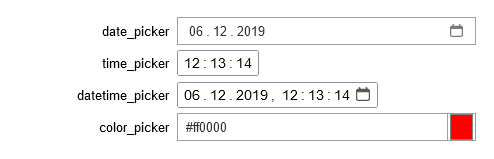

## Structure widgets

Usually all widgets are added to a single horizontal group, and are visible in the order of their declaration. In case of many widgets, you can structure your input fields in multiple groups.
Therefore you can add additional grouping information. A single group starts with `{'type':'begin_group', 'label': 'Text'}` (optionally  you can add tags here), and ends with `{'type':'end_group'}`.
Please notice, that this is the only widget element without a `name` attribute. You can have multiple `begin_group` elements before and `end_group`, so the framework will generate an accordion for you.
An example of an accordion can be seen in the example below. Groups (or accordions) cannot be nested!

In case of only a single accordion the object is named `accordion`. If you are using multiple accordions these are named `accordion0` to `accordion9`. This way you can enable or disable an accordion by 
setting `accordion.disabled = True or False`, or hide it by setting `accordion.visible = False`. You can also programmatically hide a single group of an accordion (instead of the whole accodion with all 
its groups) by setting `accordion.show_group(title="???", visible=False)` where title is the name of a group defined by the attribute `label` (or `title` is working also). Similar you can also focus a 
single group inside an accordion by setting `accordion.focus_group(title="???")`, so this named group by the attribute `title` will be expanded, all other groups of the same accordion will be collapsed. 
By setting `accordion.focus_group(title=None)` you can also collapse all groups of the accordion named `accordion`. Just remember: if you have multiple accordions in a single definition, the accordions 
get numbered, and you need to change the example above from `accordion` to the proper `accordion0` to `accordion9`, depending on the number of accordions you have declared.        
    

## Additional options

The majority of features of the Optimizer framework can be accessed by parameters of the `Optimizer` class, or by the field definition of the widgets on the different parameter tabs. For some basic configuration features valid throughout the whole notebook the `OPTIMIZER_SETTINGS`object can be used, which holds additional settings for the optimizer framework. This object has read-only members 
for the different groups of settings, and each group has certain settings that can be modified. The object should be fully self-explaining, as it can be retrieved  by printing members including explanations. These settings 
might change in the future, either being declared as the default behavior of the Optimizer framework, or transformed into a parameter of the `Optimizer` or `OptimizerModel`. Currently the `OPTIMIZER_SETTINGS` object supports the following settings:

#### OPTIMIZER_SETTINGS (status mid June 2024)
```
# annealing_log
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# >>> graphs_figsize<<<
# This property defines the figure size of the graphs-plot on the ``Anneal tracker``-tab, default is (9.0, 7.0).
OPTIMIZER_SETTINGS.annealing_log.graphs_figsize = (9.0, 7.0)

# >>> save_graphs<<<
# This property defines if graphs-plot from the 'Anneal tracker'-tab should be stored to a file. Default is False.
OPTIMIZER_SETTINGS.annealing_log.save_graphs = False

# >>> save_graphs_figsize<<<
# This property defines the figure size of the graphs-plot from the 'Anneal tracker'-tab when it is saved to a file, default is (9.0, 7.0)
OPTIMIZER_SETTINGS.annealing_log.save_graphs_figsize = (9.0, 7.0)

# >>> save_times<<<
# This property defines if times-plot from the 'Anneal tracker'-tab should be stored to a file. Default is False.
OPTIMIZER_SETTINGS.annealing_log.save_times = False

# >>> save_times_figsize<<<
# This property defines the figure size of the times-plot from the 'Anneal tracker'-tab when it is saved to a file, default is (9.0, 4.0)
OPTIMIZER_SETTINGS.annealing_log.save_times_figsize = (9.0, 4.0)

# >>> times_figsize<<<
# This property defines the figure size of the times-plot on the ``Anneal tracker``-tab, default is (9.0, 4.0).
OPTIMIZER_SETTINGS.annealing_log.times_figsize = (9.0, 4.0)

# >>> values_per_row<<<
# This property defines the number of values shown per row in the legend of the **Anneal tracker**-tab
OPTIMIZER_SETTINGS.annealing_log.values_per_row = 5

# batch
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# >>> parameter_logging<<<
# This property defines which parameters are shown in batch-mode, default is ParameterLogging.VISIBLE to show only
# parameters for which the corresponding widget's attribute visible is True. Other options are ParameterLogging.ALL to show
# all parameters and ParameterLogging.NONE to show no parameter.
OPTIMIZER_SETTINGS.batch.parameter_logging = ParameterLogging.VISIBLE

# compose
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# >>> create_summary_excel<<<
# This property defines if the summary from the 'Compose model'-tab is saved as an excel file.
OPTIMIZER_SETTINGS.compose.create_summary_excel = True

# >>> excel_summary_columns<<<
# This property defines a list of columns to be shown in the times-overview Excel sheet.
# Each entry in the list must be a tuple with 2 or 3 entries, first the name of a time measurement and second the type
# of this value. The only supported types are float, int and str. In case of a float or int the numbers are summed up.
# Optional, the third entry must be a tuple, with the first element containing the formular, and the following elements containing the
# names of the values to be inserted in the formular.
# 
# example:
#     ('Request size (in MB)', float) or
#     ('Execution time - Solve time', float, ('$1 - $2', 'Execution time', 'Solve time'))
OPTIMIZER_SETTINGS.compose.excel_summary_columns = [('CheckMD5 time', float),
                                                    ('CheckMD5 time (from - to)', str),
                                                    ('Reduce degree time', float),
                                                    ('Reduce degree time (from - to)', str),
                                                    ('Prepare QUBO time', float),
                                                    ('Prepare QUBO time (from - to)', str),
                                                    ('Save BQP time', float),
                                                    ('Save BQP time (from - to)', str),
                                                    ('Account occupied time', float),
                                                    ('Account occupied time (from - to)', str),
                                                    ('Prepare request time', float),
                                                    ('Prepare request time (from - to)', str),
                                                    ('Save request time', float),
                                                    ('Save request time (from - to)', str),
                                                    ('Send request time', float),
                                                    ('Send request time (from - to)', str),
                                                    ('Request size (in MB)', float),
                                                    ('Waiting time', float),
                                                    ('Waiting time (from - to)', str),
                                                    ('Queue time', float),
                                                    ('DAU service time', float),
                                                    ('DAU service time (from - to)', str),
                                                    ('DAU service time - Execution time', float, ('$1 - $2', 'DAU service time', 'Execution time')),
                                                    ('Execution time', float),
                                                    ('Execution time - Solve time', float, ('$1 - $2', 'Execution time', 'Solve time')),
                                                    ('Solve time', float),
                                                    ('CPU time', float),
                                                    ('Anneal time', float),
                                                    ('Receive response time', float),
                                                    ('Receive response time (from - to)', str),
                                                    ('Response size (in MB)', float),
                                                    ('Parse response time', float),
                                                    ('Parse response time (from - to)', str),
                                                    ('PrepResult time', float),
                                                    ('PrepResult time (from - to)', str)]

# >>> log_memory_size<<<
# This property defines if the total memory size of an :class:`dadk.Optimizer.OptimizerModelComplex` object ``model`` - including its ``optimizer`` (:class:`dadk.Optimizer.Optimizer` object) - should be determined after each ``build_and_solve`` call in the
# ``compose`` method.
# Only available if the optimizer is running in ``batch`` mode.
OPTIMIZER_SETTINGS.compose.log_memory_size = False

# >>> show_summary<<<
# This property defines if the summary is shown on the 'Compose model'-tab
OPTIMIZER_SETTINGS.compose.show_summary = True

# >>> summary_columns<<<
# This property defines a list of columns to be shown in the times-overview on the 'Compose model'-tab.
# Each entry in the list must be a tuple with 2 or 3 entries, first the name of a time measurement and second the type
# of this value. Currently only supported types are float, int and str. In case of a float or int the numbers are summed up.
# Optional 3. entry must be a tuple, with the first element containing the formular, and the following elements contain the
# names of the values to be inserted in the formular.
# 
# example:
#     ('Request size (in MB)', float) or
#     ('Execution time - Solve time', float, ('$1 - $2', 'Execution time', 'Solve time'))
OPTIMIZER_SETTINGS.compose.summary_columns = [('CPU time', float),
                                              ('Anneal time', float),
                                              ('Solve time', float),
                                              ('Execution time - Solve time', float, ('$1 - $2', 'Execution time', 'Solve time')),
                                              ('Execution time', float)]

# compose_log
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# >>> figsize<<<
# This property defines the figure size of the times-plot on the ``Compose tracker``-tab
OPTIMIZER_SETTINGS.compose_log.figsize = (18, 6)

# >>> save_graphs<<<
# This property defines if graphs-plot from the ``Compose tracker``-tab should be stored to a file, default is False
OPTIMIZER_SETTINGS.compose_log.save_graphs = False

# >>> save_graphs_figsize<<<
# This property defines the figure size of the graphs-plot from the ``Compose tracker``-tab when it is saved to a file, default is (9.0, 7.0)
OPTIMIZER_SETTINGS.compose_log.save_graphs_figsize = (18, 6)

# >>> values_per_row<<<
# This property defines the number of values shown per row in the legend of the ``Compose tracker``-tab.
OPTIMIZER_SETTINGS.compose_log.values_per_row = 4

# optuna
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# >>> delete_files<<<
# This property defines if newly created optuna dao-files are automatically deleted.
# If set to False the user can delete all files with a click on the 'delete'-button.
OPTIMIZER_SETTINGS.optuna.delete_files = False

# pareto
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# >>> delete_files<<<
# This property defines if newly created pareto dao-files are automatically deleted.
# If set to False the user can delete all files by clicking the 'delete'-button.
OPTIMIZER_SETTINGS.pareto.delete_files = False

# solve_dav2
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# >>> store_graphics<<<
# This property defines if the Optimizer stores graphics data from the emulator, default is False.
OPTIMIZER_SETTINGS.solve_dav2.store_graphics = False

# solve_gui
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# >>> button_width<<<
# This property defines if width in pixel of the value-field (default=70)
OPTIMIZER_SETTINGS.solve_gui.button_width = 70

# >>> description_width<<<
# This property defines the label width in pixels (default=170)
OPTIMIZER_SETTINGS.solve_gui.description_width = 170

# timeseries
# ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

# >>> delete_files<<<
# This property defines if newly created timeseries dao-files are automatically deleted.
# If set to False the user can delete all files with a click on the 'delete'-button.
OPTIMIZER_SETTINGS.timeseries.delete_files = False
```   

Let's check the current available settings via `OPTIMIZER_SETTINGS`

In [ ]:
from dadk.Optimizer import OPTIMIZER_SETTINGS
print(OPTIMIZER_SETTINGS)

Let's assume you have a huge wide-screen, and you would like to increase the size of the plot on the `Compose tracker`-tab, you can simply change the value of `OPTIMIZER_SETTINGS.compose_log.figsize = (42,9)`.

In [ ]:
OPTIMIZER_SETTINGS.compose_log.figsize = (42,9)
print(OPTIMIZER_SETTINGS.compose_log)

## Overview

In the following cell, an optimizer with all widgets listed above is implemented. As mentioned, the widgets are implemented for the "load" method which corresponds to the `Setup scenario`-tab.

In [ ]:
from dadk.Optimizer import *

MODE_TEXT = "Text"
MODE_INTEGER = "Integer"
MODE_FLOAT = "Float"
MODE_SELECT_AND_CHECK = "Select & Check"
MODE_FILE = "File"
MODE_SPECIAL = "Special"

class Demo_Widgets_Model(OptimizerModel):

    ##################################################################################################################
    def __init__(self, persistent_file="O_03_Optimizer_widgets.dao"):
    ##################################################################################################################

        OptimizerModel.__init__(
            self,
            name = 'Demo_Widgets',
            persistent_file = persistent_file,
            load_parameter=[
                {'type':'begin_group', 'label': 'Text', 'tags': [MODE_TEXT]},

                    {'name'        : "text",
                     'type'        : 'text',
                     'value'       : '',
                     'label'       : 'text',
                     'description' : 'Please add some text here',
                     'tags'        : [MODE_TEXT]},

                    {'name'        : "area",
                     'type'        : 'text_area',
                     'value'       : 'Lorem ipsum dolor sit amet, consectetur adipiscing elit. Morbi sagittis vestibulum efficitur.' +
                                     ' Maecenas ultrices sem consequat augue convallis pellentesque. Donec aliquam arcu vitae imper' +
                                     'diet tristique. Aenean quis ante nibh. Maecenas porttitor metus felis. Fusce ut maximus torto' +
                                     'r. Quisque dictum arcu a gravida varius. In egestas, nulla at tincidunt sodales, sapien metus' +
                                     ' rutrum massa, id laoreet sapien libero in nisi. Etiam vel mattis leo, at luctus tortor. Maur' +
                                     'is semper ut ex a ornare. Donec non urna sit amet turpis euismod suscipit.',
                     'label'       : 'area',
                     'description' : 'Please add some long text here',
                     'tags'        : [MODE_TEXT]},

                {'type':'begin_group', 'label': 'Integer', 'tags': [MODE_INTEGER]},

                    {'name'        : "i0",
                     'type'        : 'int',
                     'value'       : 0,
                     'label'       : '$i_{0}$',
                     'description' : 'Please select an integer value',
                     'tags'        : [MODE_INTEGER]},

                    {'name'        : "i1",
                     'type'        : 'int_bounded',
                     'value'       : 0,
                     'min'         : 0,
                     'max'         : 10,
                     'step'        : 2,
                     'label'       : '$i_{1}$',
                     'description' : 'Please select an integer value between 0 and 10, step 2',
                     'tags'        : [MODE_INTEGER]},

                    {'name'        : "i2",
                     'type'        : 'int_slider',
                     'value'       : 0,
                     'min'         : 0,
                     'max'         : 100,
                     'step'        : 5,
                     'label'       : '$i_{2}$',
                     'description' : 'Please select an integer value between 0 and 100, step = 5',
                     'tags'        : [MODE_INTEGER]},

                    {'name'        : "i3",
                     'type'        : 'int_range_slider',
                     'value'       : (25,75),
                     'min'         : 0,
                     'max'         : 100,
                     'step'        : 5,
                     'label'       : '$i_{3}$',
                     'description' : 'Please select an integer range, both values between 0 and 100, step = 5',
                     'tags'        : [MODE_INTEGER]},

                    {'name'        : "i4",
                     'type'        : 'int_range_bounded',
                     'value'       : [25,75],
                     'min'         : 0,
                     'max'         : 100,
                     'step'        : 5,
                     'label'       : '$i_{4}$',
                     'description' : 'Please select an integer range, both values between 0 and 100, step = 5',
                     'tags'        : [MODE_INTEGER]},

                {'type':'begin_group', 'label': 'Integer-Array', 'tags': [MODE_INTEGER]},

                    # just for testing 
                    {'name'        : "i5_label",
                     'type'        : 'text',
                     'value'       : 'i5',
                     'label'       : '$i_{5}$ (label)',
                     'description' : 'Just for testing label change',
                     'on_change'   : 'i5.label = new_value if new_value.strip() != "" else None',
                     'tags'        : [MODE_INTEGER]},
                
                    # just for testing 
                    {'name'        : "i5_description",
                     'type'        : 'text',
                     'value'       : 'i5',
                     'label'       : '$i_{5}$ (description)',
                     'description' : 'Just for testing description change',
                     'on_change'   : 'i5.description = new_value if new_value.strip() != "" else None',
                     'tags'        : [MODE_INTEGER]},
                
                    # just for testing 
                    {'name'        : "i5_headers",
                     'type'        : 'text',
                     'value'       : 'A;B;C;D',
                     'label'       : '$i_{5}$ (headers)',
                     'description' : 'Just for testing headers change',
                     'on_change'   : 'i5.headers = new_value.split(";") if new_value.strip() != "" else None',
                     'tags'        : [MODE_INTEGER]},
                
                    # just for testing 
                    {'name'        : "i5_row_labels",
                     'type'        : 'text',
                     'value'       : 'row-a;row-b;row-c;row-d',
                     'label'       : '$i_{5}$ (row_labels)',
                     'description' : 'Just for testing row_labels change',
                     'on_change'   : 'i5.row_labels = new_value.split(";") if new_value.strip() != "" else None',
                     'tags'        : [MODE_INTEGER]},
                
                    # just for testing 
                    {'name'        : "i5_visible",
                     'type'        : 'check',
                     'value'       : True,
                     'label'       : '$i_{5}$ (visible)',
                     'description' : 'Just for testing visible change',
                     'on_change'   : f'i5.visible = new_value and (model.Optimizer.mode is None or model.Optimizer.mode == "{MODE_INTEGER}")',
                     'tags'        : [MODE_INTEGER]},
                
                    # just for testing 
                    {'name'        : "i5_disabled",
                     'type'        : 'check',
                     'value'       : False,
                     'label'       : '$i_{5}$ (disabled)',
                     'description' : 'Just for testing disabled change',
                     'on_change'   : 'i5.disabled = new_value',
                     'tags'        : [MODE_INTEGER]},

                    {'type': 'separator'},
                
                    # optional field, if the user should be able to change the number of rows of the integer array
                    {'name'        : "i5_rows",
                     'type'        : 'int_slider',
                     'value'       : 4,
                     'min'         : 1,
                     'max'         : 10,
                     'step'        : 1,
                     'label'       : '$i_{5}$ (rows)',
                     'description' : 'Please select an integer value between 1 and 10, step = 1',
                     'on_change'   : 'i5.rows = new_value',
                     'tags'        : [MODE_INTEGER]},

                    # optional field, if the user should be able to change the number of columns of the integer array
                    {'name'        : "i5_columns",
                     'type'        : 'int_slider',
                     'value'       : 4,
                     'min'         : 1,
                     'max'         : 10,
                     'step'        : 1,
                     'label'       : '$i_{5}$ (columns)',
                     'description' : 'Please select an integer value between 1 and 10, step = 1',
                     'on_change'   : 'i5.columns = new_value',
                     'tags'        : [MODE_INTEGER]},

                    # optional field, if the user should be able to change the min-value of all fields in the integer array
                    {'name'        : "i5_min",
                     'type'        : 'int_slider',
                     'value'       : 0,
                     'min'         : 0,
                     'max'         : 99,
                     'step'        : 1,
                     'label'       : '$i_{5}$ (min)',
                     'description' : 'Please select an integer value between 0 and 9, step = 1',
                     'on_change'   : [
                                         'i5.min = new_value',     
                                         'i5.description = "Please select an integer value between %d and %d, step = %d for all fields" % (i5_min.value, i5_max.value, i5_step.value)',
                                     ],
                     'tags'        : [MODE_INTEGER]},

                    # optional field, if the user should be able to change the max-value of all fields in the integer array
                    {'name'        : "i5_max",
                     'type'        : 'int_slider',
                     'value'       : 99,
                     'min'         : 0,
                     'max'         : 99,
                     'step'        : 1,
                     'label'       : '$i_{5}$ (max)',
                     'description' : 'Please select an integer value between 0 and 9, step = 1',
                     'on_change'   : [
                                         'i5.max = new_value',     
                                         'i5.description = "Please select an integer value between %d and %d, step = %d for all fields" % (i5_min.value, i5_max.value, i5_step.value)',
                                     ],
                     'tags'        : [MODE_INTEGER]},

                    # optional field, if the user should be able to change the step-value of all fields in the integer array
                    {'name'        : "i5_step",
                     'type'        : 'int_slider',
                     'value'       : 1,
                     'min'         : 1,
                     'max'         : 4,
                     'step'        : 1,
                     'label'       : '$i_{5}$ (step)',
                     'description' : 'Please select an integer value between 1 and 4, step = 1',
                     'on_change'   : [
                                         'i5.step = new_value',     
                                         'i5.description = "Please select an integer value between %d and %d, step = %d for all fields" % (i5_min.value, i5_max.value, i5_step.value)',
                                     ],
                     'tags'        : [MODE_INTEGER]},
                
                    {'type': 'separator'},

                    {'name'        : "i5",
                     'type'        : 'int_array_bounded',
                     'rows'        : 4,
                     'columns'     : 4,
                     'headers'     : ['A', 'B', 'C', 'D'],
                     'row_labels'  : ['row-a', 'row-b', 'row-c', 'row-d'],                     
                     'value'       : [[ 1,  2,  3,  4],
                                      [ 5,  6,  7,  8],
                                      [ 9, 10, 11, 12],
                                      [13, 14, 15, 16]],
                     'min'         : 0,
                     'max'         : 99,
                     'step'        : 1,
                     'label'       : '$i_{5}$',
                     'description' : 'Please select an integer value between 0 and 9, step = 1 for all fields',
                     'on_change'   : [
                                         'import numpy as np',
                                         'i5_total.value = np.sum(np.array(new_value))'
                                     ],
                     'tags'        : [MODE_INTEGER]},

                    {'type': 'separator'},
                
                    {'name'        : "i5_total",
                     'type'        : 'int',
                     'value'       : 0,
                     'disabled'    : True,
                     'label'       : '$i_{5}$ (total)',
                     'description' : 'Here you can see the sum of all values in the $i_{5}$',
                     'tags'        : [MODE_INTEGER]},

                {'type':'begin_group', 'label': 'Float', 'tags': [MODE_FLOAT]},

                    {'name'        : 'f0',
                     'type'        : 'float',
                     'value'       : 0.0,
                     'label'       : '$f_{0}$',
                     'description' : 'Please select an float value between 0 and 0.9, step = 0.3',
                     'tags'        : [MODE_FLOAT]},

                    {'name'        : "f1",
                     'type'        : 'float_bounded',
                     'value'       : 0,
                     'min'         : 0,
                     'max'         : 0.9,
                     'step'        : 0.3,
                     'label'       : '$f_{1}$',
                     'description' : 'Please select an float value between 0 and 0.9, step = 0.3',
                     'tags'        : [MODE_FLOAT]},

                    {'name'        : "f2",
                     'type'        : 'float_slider',
                     'value'       : 0,
                     'min'         : 0,
                     'max'         : 9.9,
                     'step'        : 0.3,
                     'label'       : '$f_{2}$',
                     'description' : 'Please select an float value between 0 and 99.9, step = 0.3',
                     'tags'        : [MODE_FLOAT]},

                    {'name'        : "f3",
                     'type'        : 'float_log_slider',
                     'value'       : 1,
                     'base'        : 10,
                     'min'         : -2,
                     'max'         : +2,
                     'step'        : 0.1,
                     'label'       : '$f_{3}$',
                     'description' : 'Please select an float value between $10^{-2}$ and $10^{+2}$, step = 0.1',
                     'tags'        : [MODE_FLOAT]},

                    {'name'        : "f4",
                     'type'        : 'float_range_slider',
                     'value'       : (33.3, 66.6),
                     'min'         : 0,
                     'max'         : 99.9,
                     'step'        : 0.3,
                     'label'       : '$f_{4}$',
                     'description' : 'Please select an float range, both values between 0 and 99.9, step = 0.3',
                     'tags'        : [MODE_FLOAT]},

                    {'name'        : "f5",
                     'type'        : 'float_range_bounded',
                     'value'       : [33.3, 66.6],
                     'min'         : 0,
                     'max'         : 99.9,
                     'step'        : 0.3,
                     'label'       : '$f_{5}$',
                     'description' : 'Please select an float range, both values between 0 and 99.9, step = 0.3',
                     'tags'        : [MODE_FLOAT]},

                    {'name'        : "f6",
                     'type'        : 'float_slider',
                     'value'       : 0.5,
                     'min'         : 0.0,
                     'max'         : 1.0,
                     'step'        : 0.1,
                     'format'      : '.1f',
                     'label'       : '$f_{6}$, 1 decimal place',
                     'description' : 'Please select an float value between 0.0 and 1.0, step = 0.1',
                     'tags'        : [MODE_FLOAT]},

                    {'name'        : "f7",
                     'type'        : 'float_slider',
                     'value'       : 0.5,
                     'min'         : 0.4990,
                     'max'         : 0.5010,
                     'step'        : 0.0001,
                     'format'      : '.4f',
                     'label'       : '$f_{7}$, 4 decimal places',
                     'description' : 'Please select an float value between 0.4990 and 0.5010, step = 0.0001',
                     'tags'        : [MODE_FLOAT]},

                {'type':'begin_group', 'label': 'Float-Array', 'tags': [MODE_FLOAT]},

                    # optional field, if the user should be able to change the number of rows of the float array
                    {'name'        : "f8_rows",
                     'type'        : 'int_slider',
                     'value'       : 3,
                     'min'         : 1,
                     'max'         : 10,
                     'step'        : 1,
                     'label'       : '$f_{8}$ (rows)',
                     'description' : 'Please select an integer value between 1 and 10, step = 1',
                     'on_change'   : 'f8.rows = new_value',
                     'tags'        : [MODE_FLOAT]},

                    # optional field, if the user should be able to change the number of rows of the float array
                    {'name'        : "f8_columns",
                     'type'        : 'int_slider',
                     'value'       : 3,
                     'min'         : 1,
                     'max'         : 10,
                     'step'        : 1,
                     'label'       : '$f_{8}$ (columns)',
                     'description' : 'Please select an integer value between 1 and 10, step = 1',
                     'on_change'   : 'f8.columns = new_value',
                     'tags'        : [MODE_FLOAT]},

                    # optional field, if the user should be able to change the min-value of all fields in the float array
                    {'name'        : "f8_min",
                     'type'        : 'float_slider',
                     'value'       : 0.5,
                     'min'         : 0.5,
                     'max'         : 9.0,
                     'step'        : 0.5,
                     'label'       : '$f_{8}$ (min)',
                     'description' : 'Please select a float value between 0.5 and 9.0, step = 0.5',
                     'on_change'   : [
                                         'f8.min = new_value',     
                                         'f8.description = "Please select an float value between %.1f and %.1f, step = %.1f for all fields" % (f8_min.value, f8_max.value, f8_step.value)',
                                     ],
                     'tags'        : [MODE_FLOAT]},

                    # optional field, if the user should be able to change the max-value of all fields in the float array
                    {'name'        : "f8_max",
                     'type'        : 'float_slider',
                     'value'       : 9.0,
                     'min'         : 0.5,
                     'max'         : 9.0,
                     'step'        : 0.5,
                     'label'       : '$f_{8}$ (max)',
                     'description' : 'Please select a float value between 0.5 and 9.0, step = 0.5',
                     'on_change'   : [
                                         'f8.max = new_value',     
                                         'f8.description = "Please select an float value between %.1f and %.1f, step = %.1f for all fields" % (f8_min.value, f8_max.value, f8_step.value)',
                                     ],
                     'tags'        : [MODE_FLOAT]},

                    # optional field, if the user should be able to change the step-value of all fields in the float array
                    {'name'        : "f8_step",
                     'type'        : 'float_slider',
                     'value'       : 0.5,
                     'min'         : 0.5,
                     'max'         : 4.0,
                     'step'        : 0.5,
                     'label'       : '$f_{8}$ (step)',
                     'description' : 'Please select a float value between 0.5 and 4.0, step = 0.5',
                     'on_change'   : [
                                         'f8.step = new_value',     
                                         'f8.description = "Please select an float value between %.1f and %.1f, step = %.1f for all fields" % (f8_min.value, f8_max.value, f8_step.value)',
                                     ],
                     'tags'        : [MODE_FLOAT]},

                    {'name'        : "f8",
                     'type'        : 'float_array_bounded',
                     'rows'        : 3,
                     'columns'     : 3,
                     'headers'     : ['A', 'B', 'C'],
                     'row_labels'  : ['row-a', 'row-b', 'row-c'],     
                     'value'       : [[1, 2.5, 3],
                                      [4, 5.5, 6],
                                      [7, 8.5, 9]],
                     'min'         : 0.0,
                     'max'         : 9.0,
                     'step'        : 0.5,
                     'label'       : '$f_{8}$',
                     'description' : 'Please select an float value between %.1f and %.1f, step = %.1f for all fields' % (0.0, 9.0, 0.5),
                     'on_change'   : [
                                         'import numpy as np',
                                         'f8_total.value = np.sum(np.array(new_value))'
                                     ],
                     'tags'        : [MODE_FLOAT]},
                
                    {'name'        : "f8_total",
                     'type'        : 'float',
                     'value'       : 0.0,
                     'disabled'    : True,
                     'label'       : '$f_{8}$ (total)',
                     'description' : 'Here you can see the sum of all values in the $f_{8}$',
                     'tags'        : [MODE_FLOAT]},

                {'type':'begin_group', 'label': 'Select & Check', 'tags': [MODE_SELECT_AND_CHECK]},

                    {'name'        : 's1',
                     'type'        : 'select',
                     'value'       : 'A',
                     'options'     : ['A', 'B', 'C'],
                     'label'       : '$s_{1}$',
                     'description' : 'Please select a single value from the list',
                     'tags'        : [MODE_SELECT_AND_CHECK]},

                    {'name'        : 's2',
                     'type'        : 'select',
                     'value'       : 2,
                     'options'     : [('One', 1), ('Two', 2), ('Three', 3)],
                     'label'       : '$s_{2}$',
                     'description' : 'Please select a single value from the list',
                     'tags'        : [MODE_SELECT_AND_CHECK]},

                    {'name'        : 's3',
                     'type'        : 'select_multiple',
                     'value'       : ('a', 'c'),
                     'options'     : ['a', 'b', 'c'],
                     'label'       : '$s_{3}$',
                     'description' : 'Please select multiple valuea from the list',
                     'tags'        : [MODE_SELECT_AND_CHECK]},

                    {'name'        : 's4',
                     'type'        : 'select_slider',
                     'value'       : 'small',
                     'options'     : ['small', 'medium', 'large'],
                     'label'       : '$s_{4}$',
                     'description' : 'Please select a single value from this group',
                     'tags'        : [MODE_SELECT_AND_CHECK]},

                    {'name'        : 's5',
                     'type'        : 'select_range_slider',
                     'value'       : ('s', 'l'),
                     'options'     : ['xs', 's', 'm', 'l', 'xl'],
                     'label'       : '$s_{5}$',
                     'description' : 'Please select a range of values from this group',
                     'tags'        : [MODE_SELECT_AND_CHECK]},

                    {'name'        : 'r1',
                     'type'        : 'radio',
                     'value'       : 'small',
                     'options'     : ['small', 'medium', 'large'],
                     'label'       : '$r_{1}$',
                     'description' : 'Please select a single value from this group',
                     'tags'        : [MODE_SELECT_AND_CHECK]},

                    {'name'        : 'c1',
                     'type'        : 'check',
                     'value'       : False,
                     'label'       : '$c_{1}$',
                     'description' : 'Please switch Toggle on or off',
                     'tags'        : [MODE_SELECT_AND_CHECK]},

                {'type':'begin_group', 'label': 'File', 'tags': [MODE_FILE]},

                    {'name'        : 'file_as_string',
                     'type'        : 'file_selector',
                     'value'       : '',
                     'suffix'      : 'txt',
                     'label'       : 'file_selector (as string)',
                     'description' : 'Please select a file with suffix "txt"',
                     'tags'        : [MODE_FILE]},

                    {'name'        : 'file_as_tuple',
                     'type'        : 'file_selector',
                     'value'       : ('.', ''),
                     'suffix'      : 'txt',
                     'label'       : 'file_selector (as tuple)',
                     'description' : 'Please select a file with suffix "txt"',
                     'tags'        : [MODE_FILE]},

                    {'name'        : 'directory',
                     'type'        : 'directory_selector',
                     'value'       : '.',
                     'label'       : 'directory_selector',
                     'description' : 'Please select a directory',
                     'tags'        : [MODE_FILE]},

                {'type':'begin_group', 'label': 'Special', 'tags': [MODE_SPECIAL]},

                    {'name'        : 's_date',
                     'type'        : 'date_picker',
                     'value'       : '06.12.2019',
                     'pattern'     : '%d.%m.%Y',
                     'label'       : 'date_picker',
                     'description' : 'Please select a date',
                     'tags'        : [MODE_SPECIAL]},

                    {'name'        : 's_time',
                     'type'        : 'time_picker',
                     'value'       : '12:13:14',
                     'pattern'     : '%H:%M:%S',
                     'label'       : 'time_picker',
                     'description' : 'Please select a time',
                     'tags'        : [MODE_SPECIAL]},
                
                    {'name'        : 's_datetime',
                     'type'        : 'datetime_picker',
                     'value'       : '06.12.2019 12:13:14',
                     'pattern'     : '%d.%m.%Y %H:%M:%S',
                     'label'       : 'datetime_picker',
                     'description' : 'Please select a date & time',
                     'tags'        : [MODE_SPECIAL]},

                    {'name'        : 's_color',
                     'type'        : 'color_picker',
                     'value'       : '#ff0000',
                     'label'       : 'color_picker',
                     'description' : 'Please select a color',
                     'tags'        : [MODE_SPECIAL]},

                {'type':'end_group'},
            ],
            build_qubo_parameter=[],
            default_solver_parameter={'offset_increase_rate':0.100001})

    ##################################################################################################################
    def load(self,
             # group 'Text'
             text, area,
             # group 'Integer'
             i0, i1, i2, i3, i4,
             # group 'Integer-Array'
             i5_label, i5_description, i5_headers, i5_row_labels, i5_visible, i5_disabled, i5_rows, i5_columns, i5_min, i5_max, i5_step, i5, i5_total,
             # group 'Float'
             f0, f1, f2, f3, f4, f5, f6, f7,
             # group 'Float-Array'
             f8_rows, f8_columns, f8_min, f8_max, f8_step, f8, f8_total,
             # group 'Select & Check'
             s1, s2, s3, s4, s5, r1, c1,
             # group 'File'
             file_as_string, file_as_tuple, directory,
             # group 'Special'
             s_date, s_time, s_datetime, s_color,
             # ----------
             silent=False):
    ##################################################################################################################

        if not silent:
            print("text. . . . . . = %s" % str(text))
            print("area. . . . . . = %s" % str(area))
            print("")
            print("i0. . . . . . . = %s" % str(i0))
            print("i1. . . . . . . = %s" % str(i1))
            print("i2. . . . . . . = %s" % str(i2))
            print("i3. . . . . . . = %s" % str(i3))
            print("i4. . . . . . . = %s" % str(i4))
            print("")
            print("i5_label. . . . = %s" % str(i5_label))
            print("i5_description. = %s" % str(i5_description))
            print("i5_headers. . . = %s" % str(i5_headers))
            print("i5_row_labels . = %s" % str(i5_row_labels))
            print("i5_rows . . . . = %s" % str(i5_rows))
            print("i5_visible. . . = %s" % str(i5_visible))
            print("i5_disabled . . = %s" % str(i5_disabled))
            print("i5_columns. . . = %s" % str(i5_columns))
            print("i5_min. . . . . = %s" % str(i5_min))
            print("i5_max. . . . . = %s" % str(i5_max))
            print("i5_step . . . . = %s" % str(i5_step))
            print("i5. . . . . . . = %s" % str(i5))
            print("i5_total. . . . = %s" % str(i5_total))
            print("")
            print("f0. . . . . . . = %s" % str(f0))
            print("f1. . . . . . . = %s" % str(f1))
            print("f2. . . . . . . = %s" % str(f2))
            print("f3. . . . . . . = %s" % str(f3))
            print("f4. . . . . . . = %s" % str(f4))
            print("f5. . . . . . . = %s" % str(f5))
            print("f6. . . . . . . = %s" % str(f6))
            print("f7. . . . . . . = %s" % str(f7))
            print("")
            print("f8_rows . . . . = %s" % str(f8_rows))
            print("f8_columns. . . = %s" % str(f8_columns))
            print("f8_min. . . . . = %s" % str(f8_min))
            print("f8_max. . . . . = %s" % str(f8_max))
            print("f8_step . . . . = %s" % str(f8_step))
            print("f8. . . . . . . = %s" % str(f8))
            print("f8_total. . . . = %s" % str(f8_total))
            print("")
            print("s1. . . . . . . = %s" % str(s1))
            print("s2. . . . . . . = %s" % str(s2))
            print("s3. . . . . . . = %s" % str(s3))
            print("s4. . . . . . . = %s" % str(s4))
            print("s5. . . . . . . = %s" % str(s5))
            print("r1. . . . . . . = %s" % str(r1))
            print("c1. . . . . . . = %s" % str(c1))
            print("")
            print("file_as_string. = %s" % str(file_as_string))
            print("file_as_tuple . = %s" % str(file_as_tuple))
            print("directory . . . = %s" % str(directory))
            print("")
            print(f"s_date. . . . . = {str(s_date)} ({type(s_date)})")
            print(f"s_time. . . . . = {str(s_time)} ({type(s_time)})")
            print(f"s_datetime. . . = {str(s_datetime)} ({type(s_datetime)})")
            print(f"s_color . . . . = {str(s_color)} ({type(s_color)})")

        filename = "./%s---load.html" % self.name
        f = open(filename, "w")
        f.write('<html><h2>%s <font color="red">load</font> ready</h2></html>' % self.name)
        f.close()

        self.Optimizer.set_load_details_reference(filename)

    ##################################################################################################################
    def build_qubo(self, A=100, silent=False):
    ##################################################################################################################

        self.HQ = BinPol().add_term(1, (0,1)).add_term(1, (2,3))

        if not silent:
            print(f'''QUBO created
    Number of bits:    {self.HQ.N: 5d}
    More infos to be added ...''')

        filename = "./%s---build_qubo.html" % self.name
        f = open(filename, "w")
        f.write('<html><h2>%s <font color="red">build_qubo</font> ready</h2></html>' % self.name)
        f.close()

        self.Optimizer.set_build_qubo_details_reference(filename)

    ##################################################################################################################
    def prep_result(self, solution_list:SolutionList, silent=False):
    ##################################################################################################################

        configuration = solution_list.min_solution.configuration

        self.energy = self.HQ.compute(configuration)

        if not silent:
            print(f'''Solution energies:
    HQ:        {self.energy: 12.2f}
    More infos to be added ...''')

        filename = "./%s---prep_result.html" % self.name
        f = open(filename, "w")
        f.write('<html><h2>%s <font color="red">prep_result</font> ready</h2></html>' % self.name)
        f.close()

        self.Optimizer.set_prep_result_details_reference(filename)


The OptimzerModel-class is now filled with all types of widgets. Now it's time to start the framework with the new model, play with the input field, and get familiar with the different widgets, their usage, and their parameters. So just give it a try. Just remember: If you change the declaration of the model above, you need to execute this cell first, before you can restart the optimizer-framework in the cell below.

In [ ]:
optimizer = Optimizer(Demo_Widgets_Model())

All widgets in this example are grouped by their base functionality (text, integer, float, etc.). Not only are the widgets grouped in different categories, also different tags have been added to each group of widgets. Select one of the following `mode`s as parameter in the initialization of your optimizer, in order to see only widgets assigned to this specific group.

In [ ]:
# MODE_TEXT
# MODE_INTEGER
# MODE_FLOAT
# MODE_SELECT_AND_CHECK
# MODE_FILE
# MODE_SPECIAL

MODE = MODE_SELECT_AND_CHECK

optimizer = Optimizer(Demo_Widgets_Model(persistent_file='Demo_Widgets_(%s).dao' % MODE), mode=MODE)